# K-近邻算法（KNN）

K nearest neighbour

## 0、导引

### 如何进行电影分类
众所周知，电影可以按照题材分类，然而题材本身是如何定义的?由谁来判定某部电影属于哪
个题材?也就是说同一题材的电影具有哪些公共特征?这些都是在进行电影分类时必须要考虑的问
题。没有哪个电影人会说自己制作的电影和以前的某部电影类似，但我们确实知道每部电影在风格
上的确有可能会和同题材的电影相近。那么动作片具有哪些共有特征，使得动作片之间非常类似，
而与爱情片存在着明显的差别呢？动作片中也会存在接吻镜头，爱情片中也会存在打斗场景，我们
不能单纯依靠是否存在打斗或者亲吻来判断影片的类型。但是爱情片中的亲吻镜头更多，动作片中
的打斗场景也更频繁，基于此类场景在某部电影中出现的次数可以用来进行电影分类。

本章介绍第一个机器学习算法：K-近邻算法，它非常有效而且易于掌握。

## 1、k-近邻算法原理

简单地说，K-近邻算法采用测量不同特征值之间的距离方法进行分类。

- 优点：精度高、对异常值不敏感、无数据输入假定。
- 缺点：时间复杂度高、空间复杂度高。
- 适用数据范围：数值型和标称型。

### 工作原理

存在一个样本数据集合，也称作训练样本集，并且样本集中每个数据都存在标签，即我们知道样本集中每一数据
与所属分类的对应关系。输人没有标签的新数据后，将新数据的每个特征与样本集中数据对应的
特征进行比较，然后算法提取样本集中特征最相似数据（最近邻）的分类标签。一般来说，我们
只选择样本数据集中前K个最相似的数据，这就是K-近邻算法中K的出处,通常*K是不大于20的整数。
最后 ，选择K个最相似数据中出现次数最多的分类，作为新数据的分类*。

回到前面电影分类的例子，使用K-近邻算法分类爱情片和动作片。有人曾经统计过很多电影的打斗镜头和接吻镜头，下图显示了6部电影的打斗和接吻次数。假如有一部未看过的电影，如何确定它是爱情片还是动作片呢？我们可以使用K-近邻算法来解决这个问题。

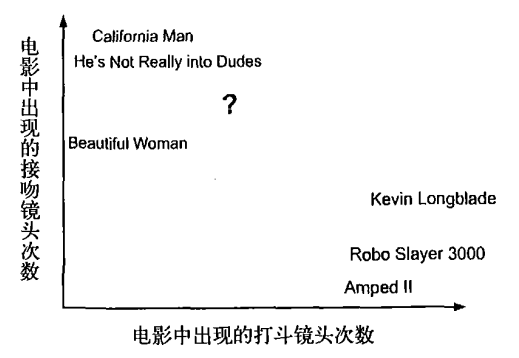

首先我们需要知道这个未知电影存在多少个打斗镜头和接吻镜头，上图中问号位置是该未知电影出现的镜头数图形化展示，具体数字参见下表。

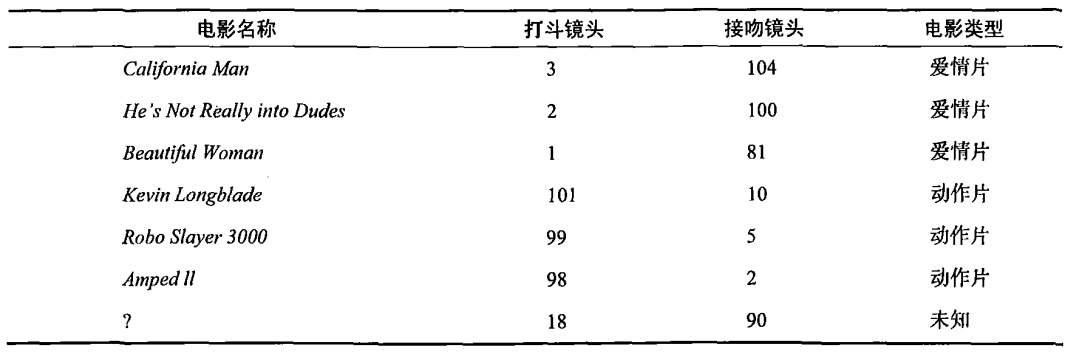

即使不知道未知电影属于哪种类型，我们也可以通过某种方法计算出来。首先计算未知电影与样本集中其他电影的距离，如图所示。

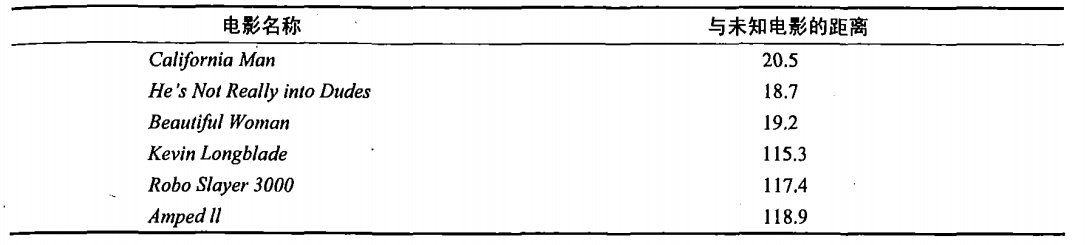

现在我们得到了样本集中所有电影与未知电影的距离，按照距离递增排序，可以找到K个距
离最近的电影。假定k=3，则三个最靠近的电影依次是California Man、He's Not Really into Dudes、Beautiful Woman。K-近邻算法按照距离最近的三部电影的类型，决定未知电影的类型，而这三部电影全是爱情片，因此我们判定未知电影是爱情片。

### 欧几里得距离(Euclidean Distance)

欧氏距离是最常见的距离度量，衡量的是多维空间中各个点之间的绝对距离。公式如下：

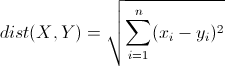

## 2、在scikit-learn库中使用k-近邻算法

- 分类问题：from sklearn.neighbors import KNeighborsClassifier

- 回归问题：from sklearn.neighbors import KNeighborsRegressor

In [1]:
import numpy as np

# 机器学习框架（google赞助）
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# 电影数据
import pandas as pd

In [6]:
movie = pd.read_excel('../data/movies.xlsx',sheet_name=1)
movie
# KNN算法，数据很少6个，此时样本，必须要均衡1:1

,电影名称,武打镜头,接吻镜头,分类情况
0,大话西游,36,1,动作片
1,杀破狼,43,2,动作片
2,前任3,0,10,爱情片
3,战狼2,59,1,动作片
4,泰坦尼克号,1,15,爱情片
5,星语心愿,2,19,爱情片


In [15]:
# 训练数据，DataFrame
X_train = movie.iloc[:-1,1:3]

# 训练数据的目标值，Series
y_train = movie['分类情况'][:-1]
# 算法，接收pandas类型数据，还可以接收numpy类型的数据
# 5个邻居
knn = KNeighborsClassifier(n_neighbors=5)


In [16]:
# 算法使用非常简单
# 第一步训练
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [10]:
# 第二步，进行预测
# 毒液，打斗107，接吻20------>动作
# 李茶的姑妈 打斗2，接吻136 ---->爱情
# 算法的数据X必须是二维[[样本一],[样本二],[样本三]]
X_test = np.array([[107,20],[2,136]])
# 2个样本，每个样本两个属性（武打镜头，接吻镜头）
X_test.shape

(2, 2)

In [11]:
# 6个样本，每个样本两个属性（武打镜头，接吻镜头）
X_train.shape

(6, 2)

In [12]:
# predict预测
knn.predict(X_test)

array(['动作片', '爱情片'], dtype=object)

In [17]:
# 训练5个样本（3个动作>2个爱情）
knn.predict(X_test)

array(['动作片', '动作片'], dtype=object)

### 0）一个最简单的例子

身高、体重、鞋子尺码数据对应性别

### 1）用于分类

导包，机器学习的算法KNN、数据蓝蝴蝶


In [18]:
import sklearn.datasets as datasets

In [20]:
iris = datasets.load_iris()
iris
# data 数据----------------target目标值
# 数据花萼长度，花萼宽度，花瓣长度，花瓣宽度，属性
X = iris['data']

y = iris['target']

获取训练样本

In [22]:
y
# 顺序打乱 150，索引0 ~ 149
index = np.arange(150)
index

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

In [23]:
# np.random.shuffle()打乱顺序
np.random.shuffle(index)
index
# 根据打乱顺序的索引去X,y中取数据

array([  4,  85,  27,  63,  89,  59,  42, 116,  22,  43,  25,   3, 121,
       102,   7,  92,  46,  51, 110,  61, 147, 100,   6,  35,  17, 108,
         5,  15, 143,  90,  74,  80,  53, 142, 120, 106,  64,  24, 113,
       148,  10,  52, 101,  16, 138,  14,  11,  26,  40, 127,  95,  82,
        36, 146,  30,  68, 136,  57,  47,  12, 105, 125,   9, 144,  23,
        67, 145,  41,  13,  65, 149, 111,  33, 141,  21,  20,  72,  94,
        32,   1,  83, 139, 137,  66, 107, 123,  39,  48,  76,  91,  29,
       131,  69, 124, 104,  31,  62,  81,  54,  87, 115, 109, 140, 119,
       134,  60,   2,  86, 126,  70,  58, 133,  37, 132, 129,  73,   0,
        56,  98,  84,  45, 118, 135,  18,  49,  28,  78,  75,  77, 130,
       122,  99,  88,  19,  55, 114,   8, 112,  96,  38, 117,  79,  34,
        93,  71,  44, 128,  50, 103,  97])

In [24]:
# 没有取之前X -------->y一一对应

# 相同规则index打乱 X ---->y 一一对应
X = X[index]
y = y[index]

In [25]:
y

array([0, 1, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 1, 0, 1, 2, 1, 2, 2,
       0, 0, 0, 2, 0, 0, 2, 1, 1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 0, 1, 2, 0,
       2, 0, 0, 0, 0, 2, 1, 1, 0, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0, 2, 0, 1,
       2, 0, 0, 1, 2, 2, 0, 2, 0, 0, 1, 1, 0, 0, 1, 2, 2, 1, 2, 2, 0, 0,
       1, 1, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1,
       1, 2, 0, 2, 2, 1, 0, 1, 1, 1, 0, 2, 2, 0, 0, 0, 1, 1, 1, 2, 2, 1,
       1, 0, 1, 2, 0, 2, 1, 0, 2, 1, 0, 1, 1, 0, 2, 1, 2, 1])

In [26]:
# 从150个中取出105个作为训练数据
# 剩下的45个作为测试数据
X_train = X[:105]
y_train = y[:105]


# 测试数据，测试X_test
X_test = X[105:]

# 保留真实，比较
y_test = y[105:]

定义KNN分类器

In [28]:
knn = KNeighborsClassifier(n_neighbors= 5)

# 第一步，进行训练
# 算法对这105个数据进行了学习fit
knn.fit(X_train,y_train)

# 第二步，进行测试
# y_接收算法的预测值，英文状态下下划线_,约定俗成
y_ = knn.predict(X_test)

display(y_,y_test)

array([1, 0, 1, 2, 2, 1, 1, 0, 2, 2, 1, 0, 1, 1, 1, 0, 2, 2, 0, 0, 0, 1,
       1, 2, 2, 2, 1, 1, 0, 1, 2, 0, 2, 1, 0, 2, 1, 0, 1, 1, 0, 2, 1, 2,
       1])

array([1, 0, 1, 2, 1, 1, 2, 0, 2, 2, 1, 0, 1, 1, 1, 0, 2, 2, 0, 0, 0, 1,
       1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 2, 1, 0, 2, 1, 0, 1, 1, 0, 2, 1, 2,
       1])

In [33]:
# 使用KNN对105个X_train(学习过的数据)进行预测
# ？？？算法，计算，死记硬背105个数据保存数据库，对比完全完全一样 ------->score
# 什么时候能够达到100%，当数据差距比较悬殊，此时，容易100%
# 3类，分类边界，有一些样本，正好在边界
knn.score(X_train,y_train)

0.9619047619047619

In [29]:
42/45

0.9333333333333333

In [31]:
# 准确率计算
acc = y_ == y_test
# mean平均值，所有的加和/45
acc.mean()

0.9333333333333333

In [32]:
# 算法提供了准确率计算的方法
knn.score(X_test,y_test)

0.9333333333333333

In [ ]:
# 癌症 0.00005概率
# 瞎蒙，所有人都不是癌症，准确率99.9995

In [ ]:
# 训练数据：测试数据 = 7:3  --->0.3
# 数据量一般0.2 ~ 0.3，数据量非常大的时候，比例减少0.1（10000）

In [34]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,y_train)

knn.score(X_test,y_test)

0.9555555555555556

In [35]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train,y_train)

knn.score(X_test,y_test)

0.9555555555555556

In [36]:
knn = KNeighborsClassifier(n_neighbors=33)

knn.fit(X_train,y_train)

knn.score(X_test,y_test)

0.8888888888888888

In [39]:
knn = KNeighborsClassifier(n_neighbors=105)

# 105
knn.fit(X_train,y_train)

knn.score(X_test,y_test)

0.26666666666666666

In [40]:
# 数据数据特征不太明显的时候，
knn = KNeighborsClassifier(n_neighbors=5,weights='distance')

knn.fit(X_train,y_train)

knn.score(X_test,y_test)

0.9333333333333333

第一步，训练数据

第二步预测数据：，所预测的数据，自己创造，就是上面所显示图片的背景点  

生成预测数据

对数据进行预测

显示数据

### 2）用于回归  
回归用于对趋势的预测

导包

生成样本数据

生成测试数据的结果

第一步：生成模型，并训练数据

第二步：使用模型，预测数据

绘图显示数据

### 练习
人类动作识别  
步行，上楼，下楼，坐着，站立和躺着  
![](stand-sit-run.jpg)  
数据采集每个人在腰部穿着智能手机，进行了六个活动（步行，上楼，下楼，坐着，站立和躺着）。采用嵌入式加速度计和陀螺仪，以50Hz的恒定速度捕获3轴线性加速度和3轴角速度，来获取数据

导入数据

In [1]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier



获取数据

In [2]:
X_train = np.load('./x_train.npy')
y_train = np.load('./y_train.npy')


X_test = np.load('./x_test.npy')
y_test = np.load('./y_test.npy')


In [3]:
# 7352个样本，561个属性，人体动作
# 

X_train.shape

(7352, 561)

In [4]:
X_test.shape

(2947, 561)

In [6]:
%%time
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

y_ = knn.predict(X_test)
print((y_ == y_test).mean())

0.9015948422124194
Wall time: 18.2 s


In [7]:
%%time
knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X_train,y_train)

y_ = knn.predict(X_test)
print((y_ == y_test).mean())

0.9046487953851374
Wall time: 18.5 s


In [8]:
labels = np.array(['walking','walk upstare','walk downstare','sitting','standing','lying'])

In [10]:
# 去重
np.unique(y_test)

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [12]:
y_test[:200]

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4], dtype=int64)

In [16]:
# 动作5--standing
X_test[0]


# 动作1 walking
np.argwhere(y_test == 1)

# 上楼，2
np.argwhere(y_test == 2)

array([[ 133],
       [ 134],
       [ 135],
       [ 136],
       [ 137],
       [ 138],
       [ 139],
       [ 140],
       [ 141],
       [ 142],
       [ 143],
       [ 144],
       [ 145],
       [ 146],
       [ 147],
       [ 148],
       [ 149],
       [ 150],
       [ 151],
       [ 152],
       [ 153],
       [ 154],
       [ 155],
       [ 156],
       [ 157],
       [ 279],
       [ 280],
       [ 281],
       [ 282],
       [ 283],
       [ 284],
       [ 285],
       [ 286],
       [ 287],
       [ 288],
       [ 289],
       [ 290],
       [ 291],
       [ 292],
       [ 293],
       [ 294],
       [ 295],
       [ 296],
       [ 297],
       [ 298],
       [ 299],
       [ 300],
       [ 301],
       [ 438],
       [ 439],
       [ 440],
       [ 441],
       [ 442],
       [ 443],
       [ 444],
       [ 445],
       [ 446],
       [ 447],
       [ 448],
       [ 449],
       [ 450],
       [ 451],
       [ 452],
       [ 453],
       [ 454],
       [ 455],
       [ 4

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
labels

array(['walking', 'walk upstare', 'walk downstare', 'sitting', 'standing',
       'lying'], dtype='<U14')

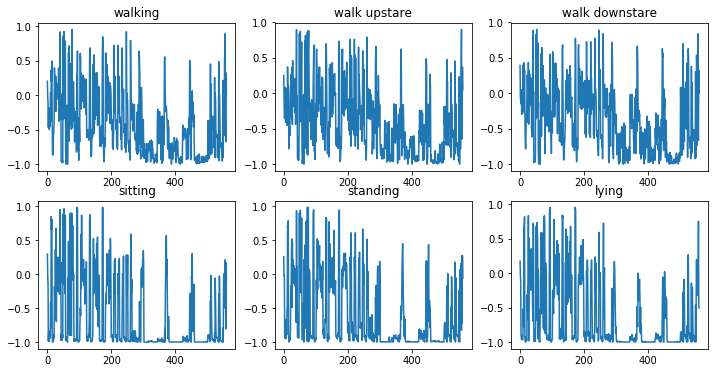

In [20]:
plt.figure(figsize=(12,6))
for i in range(1,7):
    
    index = np.argwhere(y_test == i)
    
    n = index[0,0]
    
#     根据索引取数据X_test
    axes = plt.subplot(2,3,i)
    axes.plot(X_test[n])
    
    axes.set_title(labels[i-1])

绘制

## 3、作业

#### 1、预测年收入是否大于50K美元

读取adult.txt文件，最后一列是年收入，并使用KNN算法训练模型，然后使用模型预测一个人的年收入是否大于50

In [21]:
import pandas as pd


In [22]:
salary = pd.read_csv('../data/adults.txt')
display(salary.shape,salary.head())

(32561, 15)

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [23]:
salary.columns

Index(['age', 'workclass', 'final_weight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

In [24]:
salary.drop(labels=['final_weight', 'education','capital_gain', 'capital_loss'],axis = 1,inplace=True)

In [25]:
salary.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,salary
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [26]:
X = salary.iloc[:,:-1]

y = salary.salary

In [27]:
knn = KNeighborsClassifier()

# ValueError: could not convert string to float: 'United-States'
# str类型数据不能参与计算
knn.fit(X,y)

ValueError: could not convert string to float: 'United-States'

In [28]:
X.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba


In [29]:
w = X['workclass'].unique()
w

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [30]:
np.argwhere(w == 'Private')

array([[2]], dtype=int64)

In [31]:
def convert(x):
#     x Private,Without-pay……
    return np.argwhere(w == x)[0,0]

X['workclass'] = X['workclass'].map(convert)

In [32]:
X.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country
0,39,0,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States
1,50,1,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States
2,38,2,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States
3,53,2,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States
4,28,2,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba


获取年龄、教育程度、职位、每周工作时间作为机器学习数据  
获取薪水作为对应结果

数据转换，将String类型数据转换为int

【知识点】map方法，进行数据转换

切片：训练数据和预测数据

生成算法

第一步：训练数据

第二步：预测数据

保存训练模型  
from sklearn.externals import joblib

#### 2、小麦种类预测

读取seeds.tsv文件，最后一列是小麦品种，其他列是小麦特征

#### 3、改进约会网站的匹配效果

读取datingTestSet.txt文件，最后一列是喜欢程度。模型：根据前几列的信息，预测喜欢程度